In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,plot_roc_curve, r2_score,mean_squared_error


In [2]:
df=pd.read_csv('../Resources/healthcare-dataset-stroke-data.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Clean up Data  PART 1  NO imputing- remove all nan , unknown and encode string 

In [4]:
# drop ID column as it does not effect anything

In [5]:
df.drop('id',axis=1,inplace=True)

In [15]:
# for part 1 remove all missing values and unknown rows 
nobmi_df=df[df['bmi'].isna()]
nobmi_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


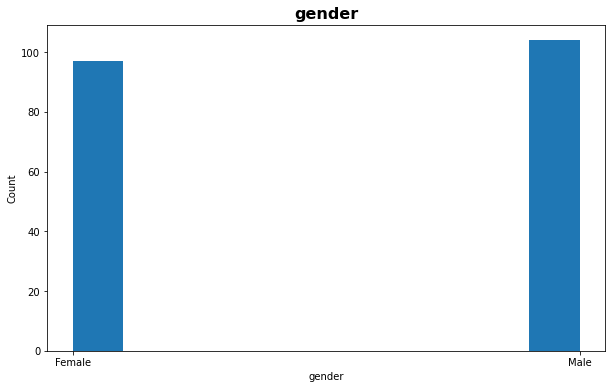

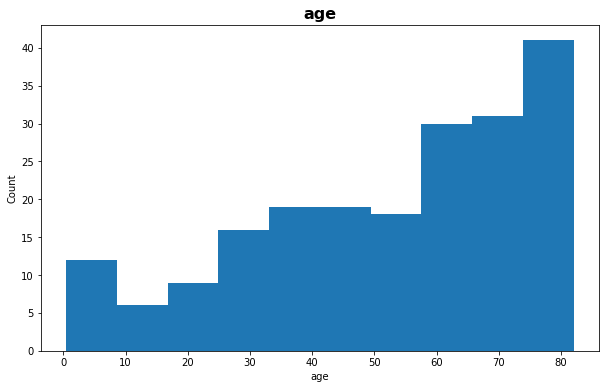

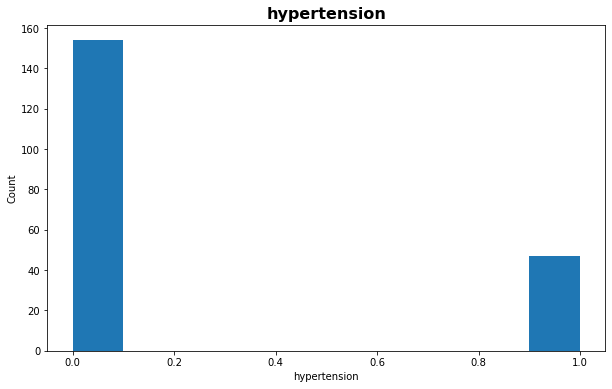

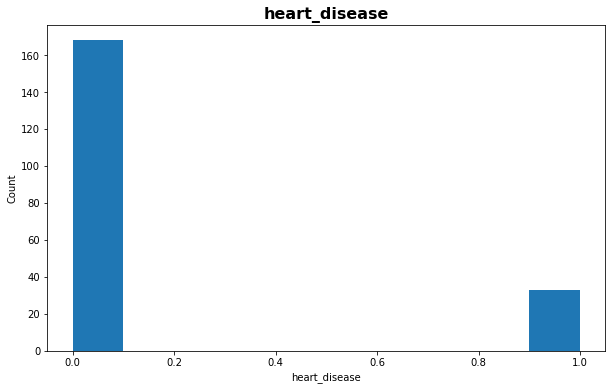

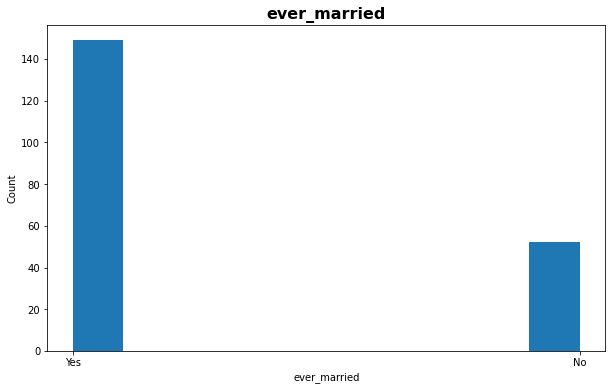

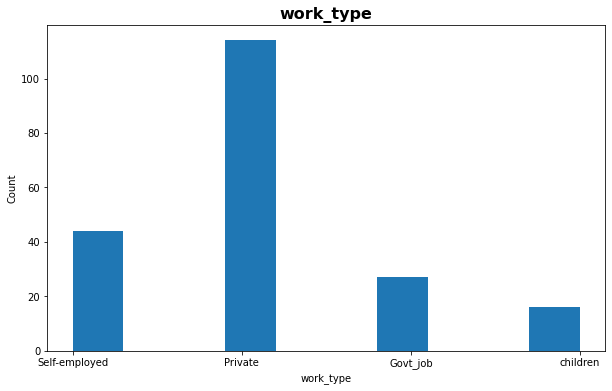

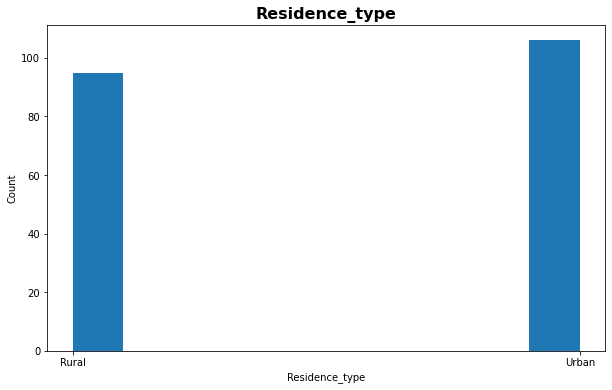

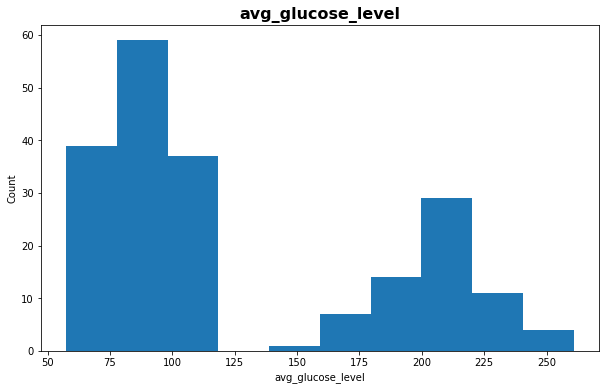

C:\Users\ykras\anaconda3\envs\ml\lib\site-packages\matplotlib\axes\_axes.py:6710: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\ykras\anaconda3\envs\ml\lib\site-packages\matplotlib\axes\_axes.py:6711: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

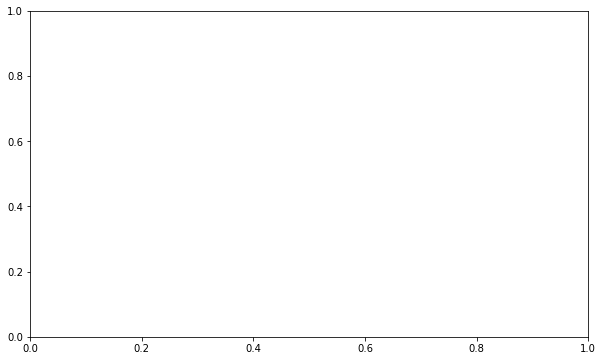

In [17]:
for col in nobmi_df.columns:
    
    plt.figure(figsize=(10,6))
    plt.hist(nobmi_df[col])
    plt.title(col, fontsize=16, fontweight="bold")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()

In [18]:
df_nonan=df.dropna()
df_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [20]:
df_nomissing=df_nonan.loc[(df_nonan['smoking_status']!='Unknown')&(df_nonan['gender']!='Other')].reset_index(drop=True)
df_nomissing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425 entries, 0 to 3424
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3425 non-null   object 
 1   age                3425 non-null   float64
 2   hypertension       3425 non-null   int64  
 3   heart_disease      3425 non-null   int64  
 4   ever_married       3425 non-null   object 
 5   work_type          3425 non-null   object 
 6   Residence_type     3425 non-null   object 
 7   avg_glucose_level  3425 non-null   float64
 8   bmi                3425 non-null   float64
 9   smoking_status     3425 non-null   object 
 10  stroke             3425 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 294.5+ KB


In [21]:
df_nomissing.loc[df_nomissing['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [22]:
# Smoking Labels

In [23]:
target_labels = []
for _, row in df_nomissing.iterrows():
    if row.smoking_status == "never smoked":
        target_labels.append(0)
    elif row.smoking_status == "formerly smoked":
        target_labels.append(1)
    else:
        target_labels.append(2)

In [24]:
len(target_labels)

3425

In [25]:
df_nomissing["smoke_label"] = target_labels

In [26]:
# work Type labels

In [27]:
df_nomissing.work_type.value_counts()

Private          2200
Self-employed     629
Govt_job          514
children           68
Never_worked       14
Name: work_type, dtype: int64

In [28]:
target_labels = []
for _, row in df_nomissing.iterrows():
    if row.work_type == "children":
        target_labels.append(0)
    elif row.work_type == "Never_worked":
        target_labels.append(1)
    elif row.work_type == "Govt_job":
        target_labels.append(2)
    elif row.work_type == "Self-employed":
        target_labels.append(3)
    else:
        target_labels.append(4)

In [29]:
df_nomissing["work_label"] = target_labels

In [30]:
df_nomissing.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'smoke_label', 'work_label'],
      dtype='object')

In [31]:
# gender, married, residence encoding

In [32]:
dummies = pd.get_dummies(df_nomissing[['gender',"ever_married","Residence_type"]], drop_first=True) # ONLY FOR LINEAR MODELS
dummies

,gender_Male,ever_married_Yes,Residence_type_Urban
0,1,1,1
1,1,1,0
2,0,1,1
3,0,1,0
4,1,1,1
...,...,...,...
3420,1,1,0
3421,0,1,0
3422,0,1,1
3423,0,1,0


In [33]:
df_nomissing[["gender_label",'married_labels','residence_label']]=dummies 

In [34]:
df_nomissing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425 entries, 0 to 3424
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3425 non-null   object 
 1   age                3425 non-null   float64
 2   hypertension       3425 non-null   int64  
 3   heart_disease      3425 non-null   int64  
 4   ever_married       3425 non-null   object 
 5   work_type          3425 non-null   object 
 6   Residence_type     3425 non-null   object 
 7   avg_glucose_level  3425 non-null   float64
 8   bmi                3425 non-null   float64
 9   smoking_status     3425 non-null   object 
 10  stroke             3425 non-null   int64  
 11  smoke_label        3425 non-null   int64  
 12  work_label         3425 non-null   int64  
 13  gender_label       3425 non-null   uint8  
 14  married_labels     3425 non-null   uint8  
 15  residence_label    3425 non-null   uint8  
dtypes: float64(3), int64(5),

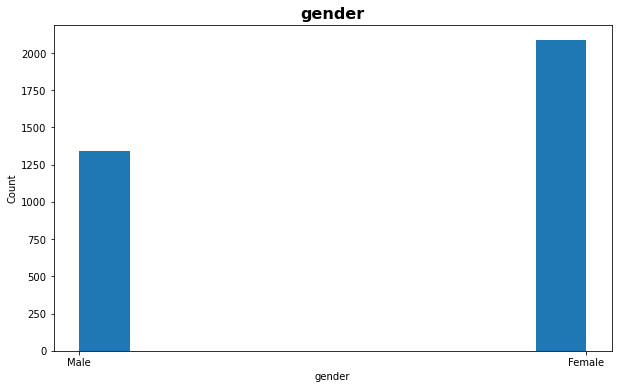

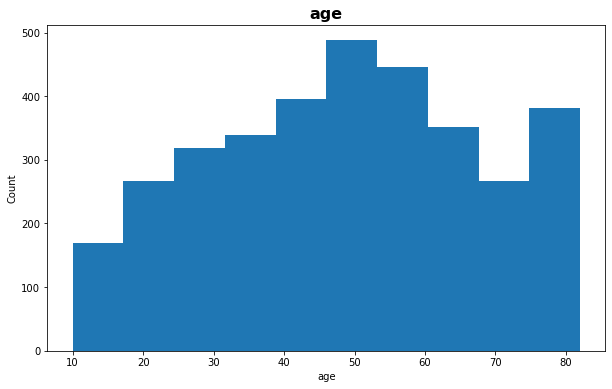

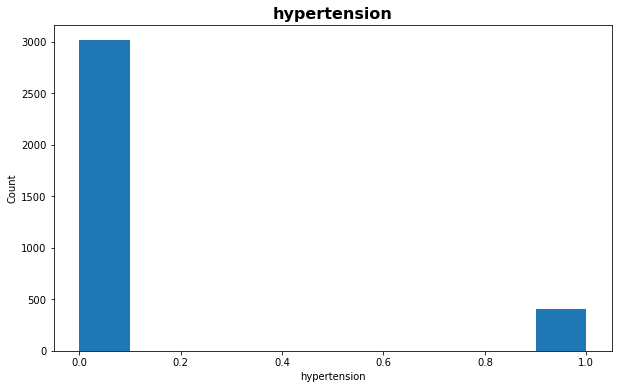

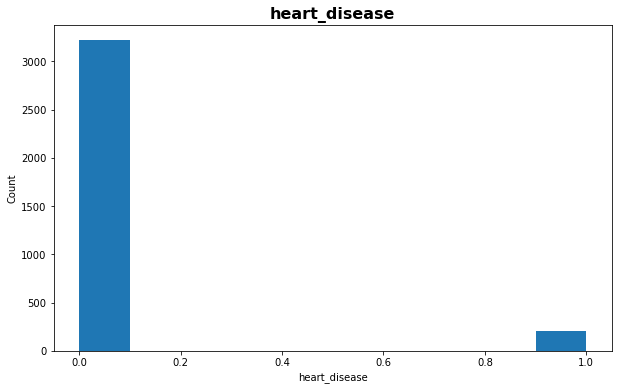

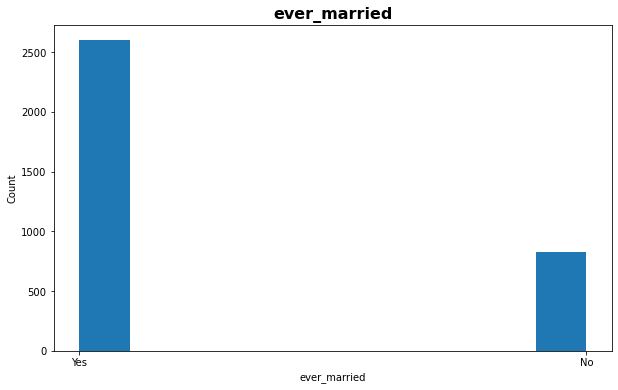

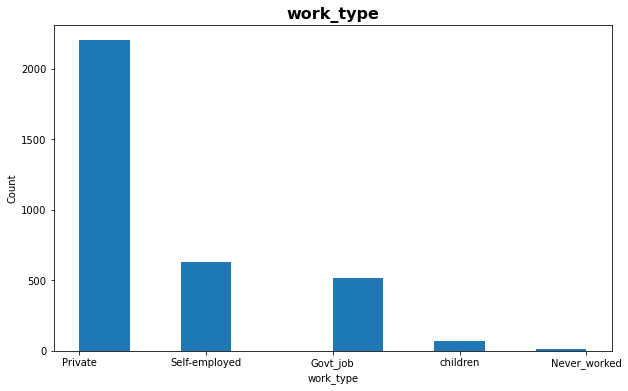

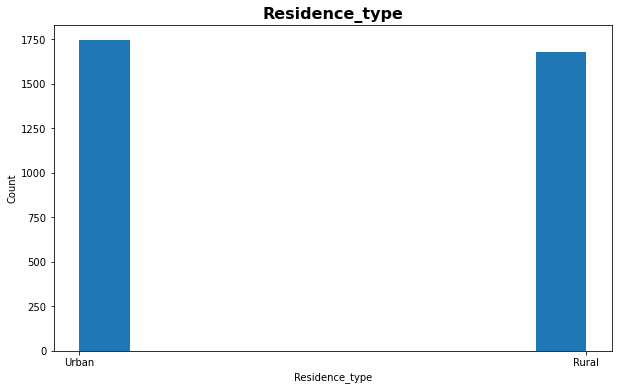

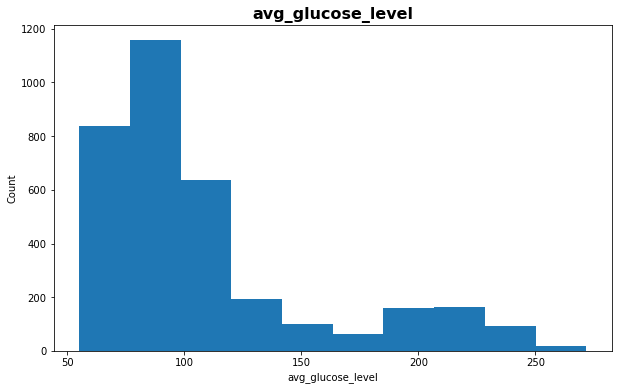

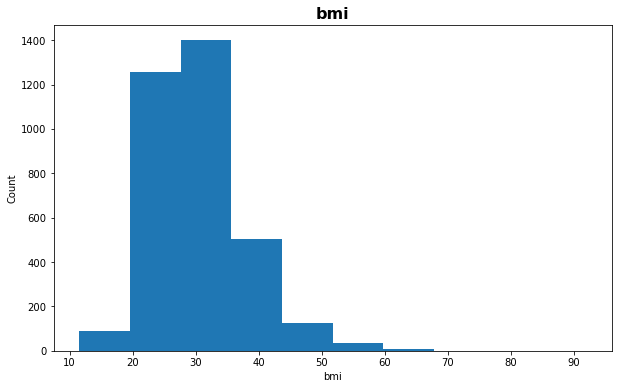

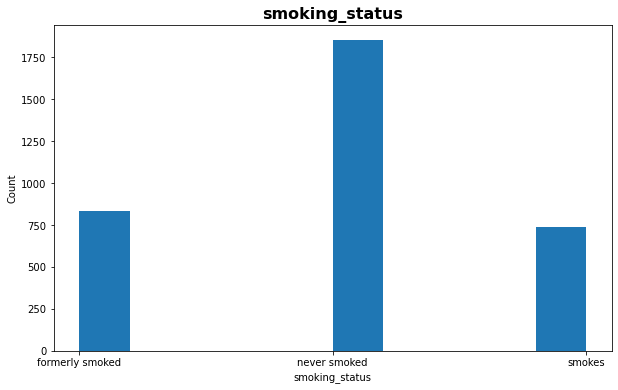

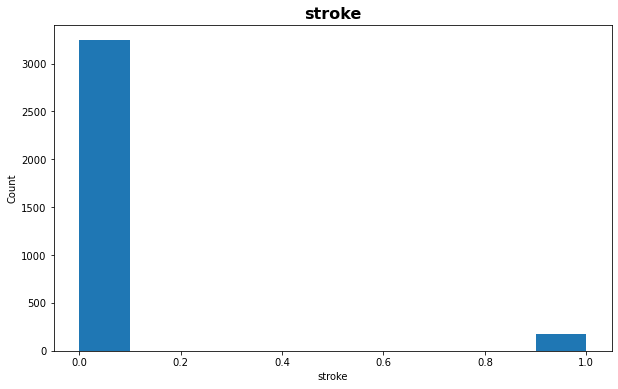

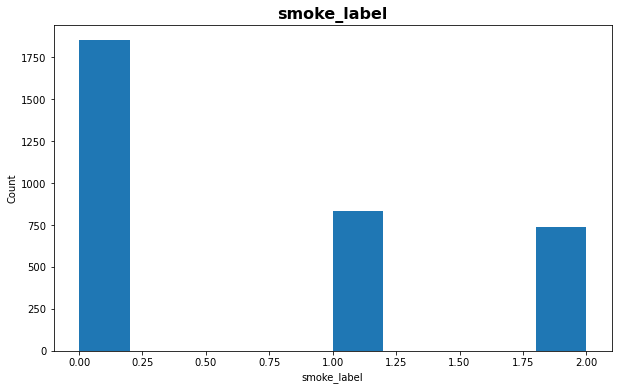

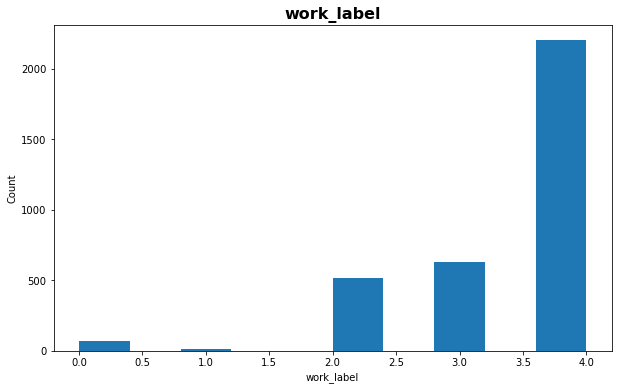

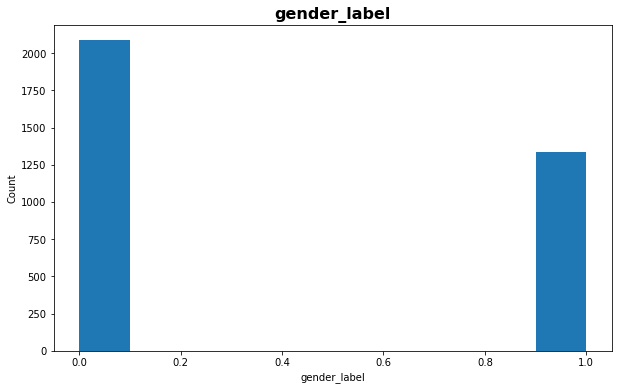

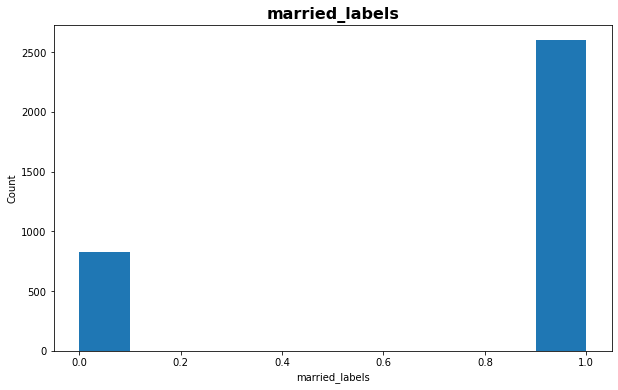

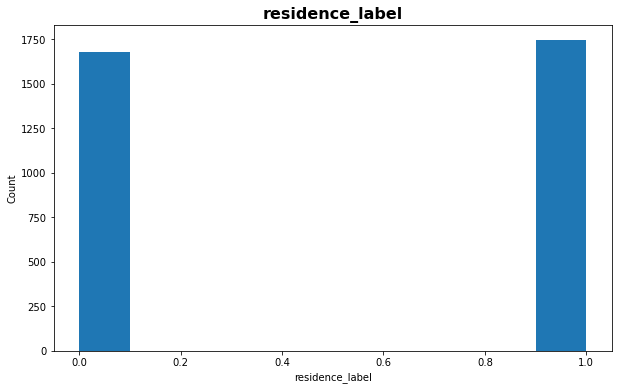

In [35]:
for col in df_nomissing.columns:
    
    plt.figure(figsize=(10,6))
    plt.hist(df_nomissing[col])
    plt.title(col, fontsize=16, fontweight="bold")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()

In [36]:
clean_df=df_nomissing.select_dtypes(exclude='object')
clean_df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'smoke_label', 'work_label', 'gender_label', 'married_labels',
       'residence_label'],
      dtype='object')

<AxesSubplot:xlabel='smoke_label', ylabel='Density'>

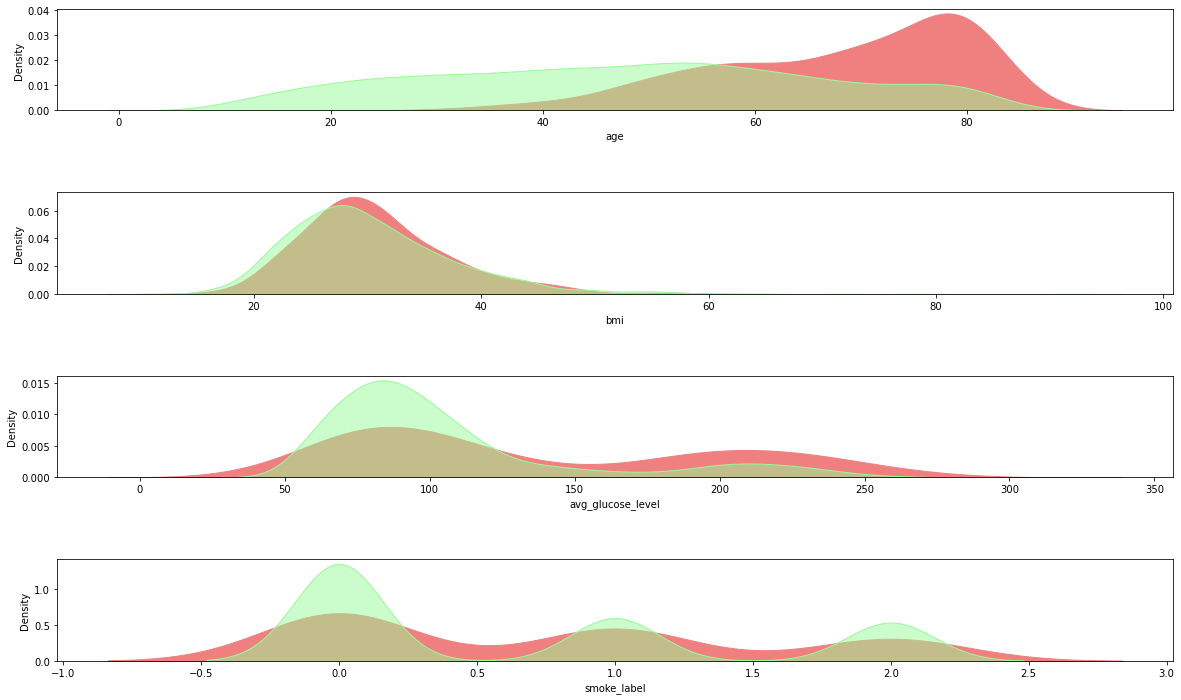

In [37]:
fig=plt.figure(figsize=(20,12),facecolor='white')

ax=[None for i in range(4)]
gs=fig.add_gridspec(4,1)
gs.update(wspace=0, hspace=0.8)

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[1,0])
ax[2]=fig.add_subplot(gs[2,0])
ax[3]=fig.add_subplot(gs[3,0])
sns.kdeplot(data=clean_df[clean_df.stroke==1],x='age',ax=ax[0],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=clean_df[clean_df.stroke==0],x='age',ax=ax[0],shade=True,color='palegreen',alpha=0.5)

sns.kdeplot(data=clean_df[clean_df.stroke==1],x='bmi',ax=ax[1],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=clean_df[clean_df.stroke==0],x='bmi',ax=ax[1],shade=True,color='palegreen',alpha=0.5)

sns.kdeplot(data=clean_df[clean_df.stroke==1],x='avg_glucose_level',ax=ax[2],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=clean_df[clean_df.stroke==0],x='avg_glucose_level',ax=ax[2],shade=True,color='palegreen',alpha=0.5)

sns.kdeplot(data=clean_df[clean_df.stroke==1],x='smoke_label',ax=ax[3],shade=True,color='lightcoral',alpha=1)
sns.kdeplot(data=clean_df[clean_df.stroke==0],x='smoke_label',ax=ax[3],shade=True,color='palegreen',alpha=0.5)

In [38]:
clean_df.corr().sort_values(by=['bmi'], ascending=False)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoke_label,work_label,gender_label,married_labels,residence_label
bmi,0.079317,0.132544,0.001208,0.156675,1.000000,0.011601,0.037676,0.073653,0.014284,0.155040,-0.008779
avg_glucose_level,0.233974,0.168769,0.143152,1.000000,0.156675,0.140515,0.006199,-0.017474,0.070169,0.119044,-0.011832
married_labels,0.523017,0.116716,0.076589,0.119044,0.155040,0.071603,0.074583,0.072666,0.018076,1.000000,0.009336
hypertension,0.267030,1.000000,0.111683,0.168769,0.132544,0.143626,-0.001316,-0.006226,0.037853,0.116716,-0.003374
age,1.000000,0.267030,0.260077,0.233974,0.079317,0.242465,0.054104,0.024642,0.044580,0.523017,0.015472
work_label,0.024642,-0.006226,0.011683,-0.017474,0.073653,0.013959,0.054961,1.000000,-0.019606,0.072666,-0.020670
smoke_label,0.054104,-0.001316,0.062549,0.006199,0.037676,0.022071,1.000000,0.054961,0.073409,0.074583,0.039903
gender_label,0.044580,0.037853,0.101834,0.070169,0.014284,0.012413,0.073409,-0.019606,1.000000,0.018076,-0.013412
stroke,0.242465,0.143626,0.138538,0.140515,0.011601,1.000000,0.022071,0.013959,0.012413,0.071603,0.005999
heart_disease,0.260077,0.111683,1.000000,0.143152,0.001208,0.138538,0.062549,0.011683,0.101834,0.076589,0.009937


In [58]:
corrs=abs(clean_df.corr()['bmi']).sort_values(ascending=False)
predictive_cols=[]
for name,col in corrs.iteritems():
    if col>0.08:
        predictive_cols.append(name)
predictive_cols

['bmi', 'avg_glucose_level', 'married_labels', 'hypertension']

<AxesSubplot:>

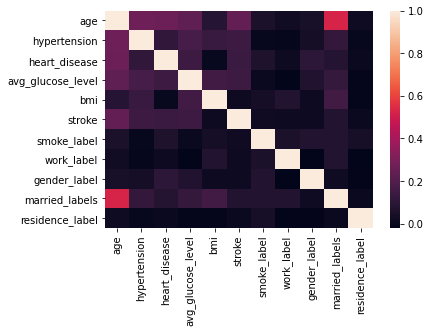

In [59]:
sns.heatmap(clean_df.corr())

In [60]:
predict_df=clean_df.loc[:,predictive_cols]
predict_df

,bmi,avg_glucose_level,married_labels,hypertension
0,36.6,228.69,1,0
1,32.5,105.92,1,0
2,34.4,171.23,1,0
3,24.0,174.12,1,1
4,29.0,186.21,1,0
...,...,...,...,...
3420,28.3,71.97,1,1
3421,21.7,77.93,1,0
3422,40.0,125.20,1,0
3423,30.6,82.99,1,0


## linear Classifier

In [61]:
from sklearn.linear_model import Ridge, LinearRegression,Lasso, ElasticNet




Model Evaluation Report
The In Sample R2 Score: 0.5270415319872122
The In Sample MSE: 25.34636394971614

The Out Sample R2 Score: 0.6066955565863139
The Out Sample MSE: 20.316719789132197


Text(0.5, 1.0, 'actual vs Predicted')

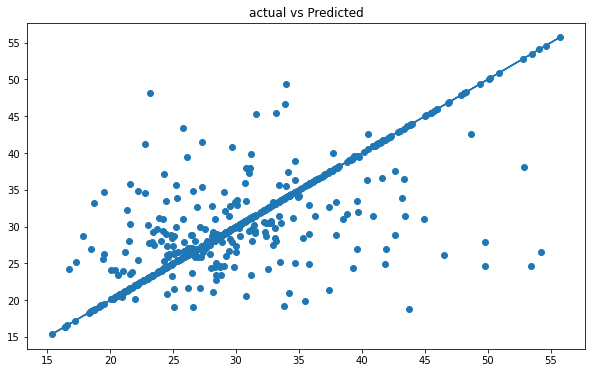

In [85]:
################################################# features
features = predict_df.drop('bmi',axis=1)
target = predict_df["bmi"]
X = features.to_numpy()
y = target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

################################################# initialize

reg = ElasticNet().fit(X_train, y_train)



# predict
in_preds = classifier.predict(X_train)
out_preds = classifier.predict(X_test)

################################################# evaluate Regression
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample MSE: {mean_squared_error(y_train, in_preds)}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")
plt.figure(figsize=(10,6))
plt.scatter(y_test,out_preds)
plt.plot(y_test,y_test)
plt.title("actual vs Predicted")

################################################# evaluate Classification

# print("Model Evaluation Report")
# print(f"In Sample Classification Report: \n{classification_report(y_train, in_preds)}")
# print(f"In Sample Confusion Matrix: \n{confusion_matrix(y_train, in_preds)}")

# # roc curve
# plot_roc_curve(classifier, X_train, y_train)
# plt.title("In Sample ROC Curve")
# plt.show()

# print()
# print(f"Out Sample Classification Report: \n{classification_report(y_test, out_preds)}")
# print(f"Out Sample Confusion Matrix: \n{confusion_matrix(y_test, out_preds)}")

# # roc curve
# plot_roc_curve(classifier, X_test, y_test)
# plt.title("Out Sample ROC Curve")
# plt.show()

# classifier.predict_proba(X_train)

## KNeighborsClassifier

In [63]:
from sklearn.neighbors import KNeighborsRegressor

Model Evaluation Report
The In Sample R2 Score: 0.5371212112763786
The In Sample MSE: 24.90207613544201

The Out Sample R2 Score: 0.565644026975777
The Out Sample MSE: 22.09387104622871


Text(0.5, 1.0, 'actual vs Predicted')

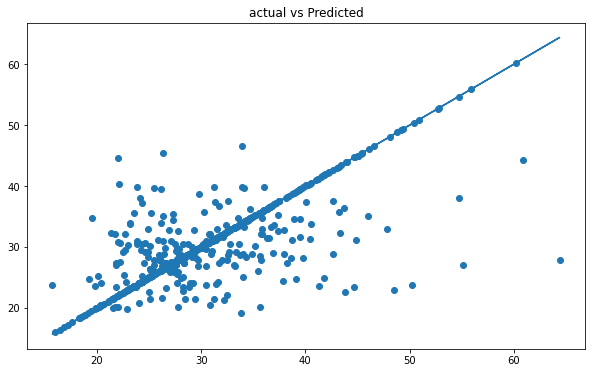

In [86]:
################################################# features
features = predict_df.drop('bmi',axis=1)
target = predict_df["bmi"]
X = features.to_numpy()
y = target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

################################################# initialize

reg = KNeighborsRegressor(n_neighbors=20).fit(X_train, y_train)



# predict
in_preds = classifier.predict(X_train)
out_preds = classifier.predict(X_test)

################################################# evaluate Regression
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample MSE: {mean_squared_error(y_train, in_preds)}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")
plt.figure(figsize=(10,6))
plt.scatter(y_test,out_preds)
plt.plot(y_test,y_test)
plt.title("actual vs Predicted")

################################################# evaluate Classification

# print("Model Evaluation Report")
# print(f"In Sample Classification Report: \n{classification_report(y_train, in_preds)}")
# print(f"In Sample Confusion Matrix: \n{confusion_matrix(y_train, in_preds)}")

# # roc curve
# plot_roc_curve(classifier, X_train, y_train)
# plt.title("In Sample ROC Curve")
# plt.show()

# print()
# print(f"Out Sample Classification Report: \n{classification_report(y_test, out_preds)}")
# print(f"Out Sample Confusion Matrix: \n{confusion_matrix(y_test, out_preds)}")

# # roc curve
# plot_roc_curve(classifier, X_test, y_test)
# plt.title("Out Sample ROC Curve")
# plt.show()

# classifier.predict_proba(X_train)

In [65]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


Model Evaluation Report
The In Sample R2 Score: 0.5371212112763786
The In Sample MSE: 24.90207613544201

The Out Sample R2 Score: 0.565644026975777
The Out Sample MSE: 22.09387104622871


Text(0.5, 1.0, 'actual vs Predicted')

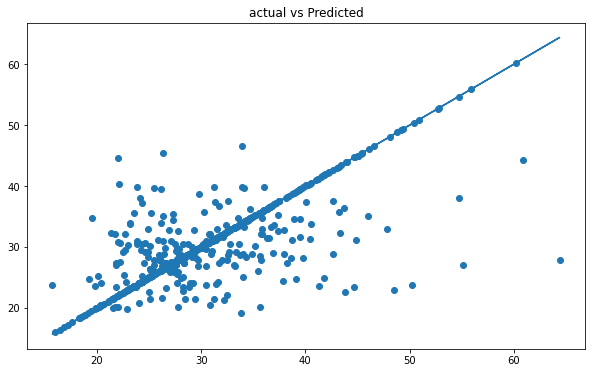

In [82]:
################################################# features
features = predict_df.drop('bmi',axis=1)
target = predict_df["bmi"]
X = features.to_numpy()
y = target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

################################################# initialize

reg = DecisionTreeRegressor().fit(X_train, y_train)



# predict
in_preds = classifier.predict(X_train)
out_preds = classifier.predict(X_test)

################################################# evaluate Regression
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample MSE: {mean_squared_error(y_train, in_preds)}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")
plt.figure(figsize=(10,6))
plt.scatter(y_test,out_preds)
plt.plot(y_test,y_test)
plt.title("actual vs Predicted")

################################################# evaluate Classification

# print("Model Evaluation Report")
# print(f"In Sample Classification Report: \n{classification_report(y_train, in_preds)}")
# print(f"In Sample Confusion Matrix: \n{confusion_matrix(y_train, in_preds)}")

# # roc curve
# plot_roc_curve(classifier, X_train, y_train)
# plt.title("In Sample ROC Curve")
# plt.show()

# print()
# print(f"Out Sample Classification Report: \n{classification_report(y_test, out_preds)}")
# print(f"Out Sample Confusion Matrix: \n{confusion_matrix(y_test, out_preds)}")

# # roc curve
# plot_roc_curve(classifier, X_test, y_test)
# plt.title("Out Sample ROC Curve")
# plt.show()

# classifier.predict_proba(X_train)

In [75]:
from sklearn.svm import SVR

Model Evaluation Report
The In Sample R2 Score: 0.5371212112763786
The In Sample MSE: 24.90207613544201

The Out Sample R2 Score: 0.565644026975777
The Out Sample MSE: 22.09387104622871


Text(0.5, 1.0, 'actual vs Predicted')

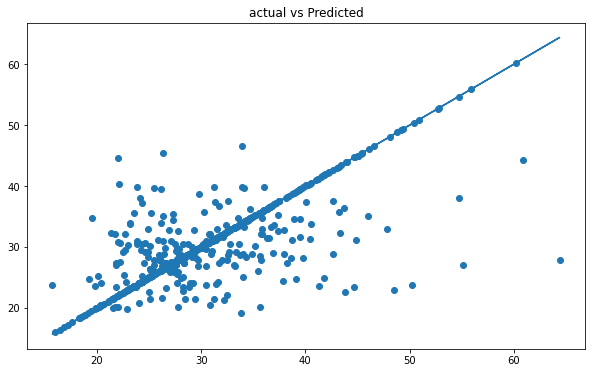

In [81]:
################################################# features
features = predict_df.drop('bmi',axis=1)
target = predict_df["bmi"]
X = features.to_numpy()
y = target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

################################################# initialize

reg = SVR().fit(X_train, y_train)



# predict
in_preds = classifier.predict(X_train)
out_preds = classifier.predict(X_test)

################################################# evaluate Regression
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample MSE: {mean_squared_error(y_train, in_preds)}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")
plt.figure(figsize=(10,6))
plt.scatter(y_test,out_preds)
plt.plot(y_test,y_test)
plt.title("actual vs Predicted")

################################################# evaluate Classification

# print("Model Evaluation Report")
# print(f"In Sample Classification Report: \n{classification_report(y_train, in_preds)}")
# print(f"In Sample Confusion Matrix: \n{confusion_matrix(y_train, in_preds)}")

# # roc curve
# plot_roc_curve(classifier, X_train, y_train)
# plt.title("In Sample ROC Curve")
# plt.show()

# print()
# print(f"Out Sample Classification Report: \n{classification_report(y_test, out_preds)}")
# print(f"Out Sample Confusion Matrix: \n{confusion_matrix(y_test, out_preds)}")

# # roc curve
# plot_roc_curve(classifier, X_test, y_test)
# plt.title("Out Sample ROC Curve")
# plt.show()

# classifier.predict_proba(X_train)

In [87]:
from xgboost import XGBRegressor

Model Evaluation Report
The In Sample R2 Score: 0.5371212112763786
The In Sample MSE: 24.90207613544201

The Out Sample R2 Score: 0.565644026975777
The Out Sample MSE: 22.09387104622871


Text(0.5, 1.0, 'actual vs Predicted')

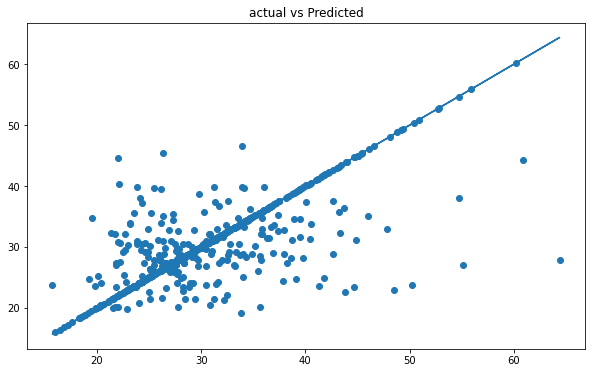

In [88]:
################################################# features
features = predict_df.drop('bmi',axis=1)
target = predict_df["bmi"]
X = features.to_numpy()
y = target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

################################################# initialize

reg = XGBRegressor().fit(X_train, y_train)



# predict
in_preds = classifier.predict(X_train)
out_preds = classifier.predict(X_test)

################################################# evaluate Regression
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample MSE: {mean_squared_error(y_train, in_preds)}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")
plt.figure(figsize=(10,6))
plt.scatter(y_test,out_preds)
plt.plot(y_test,y_test)
plt.title("actual vs Predicted")

################################################# evaluate Classification

# print("Model Evaluation Report")
# print(f"In Sample Classification Report: \n{classification_report(y_train, in_preds)}")
# print(f"In Sample Confusion Matrix: \n{confusion_matrix(y_train, in_preds)}")

# # roc curve
# plot_roc_curve(classifier, X_train, y_train)
# plt.title("In Sample ROC Curve")
# plt.show()

# print()
# print(f"Out Sample Classification Report: \n{classification_report(y_test, out_preds)}")
# print(f"Out Sample Confusion Matrix: \n{confusion_matrix(y_test, out_preds)}")

# # roc curve
# plot_roc_curve(classifier, X_test, y_test)
# plt.title("Out Sample ROC Curve")
# plt.show()

# classifier.predict_proba(X_train)

In [89]:
from sklearn.neural_network import MLPRegressor

Model Evaluation Report
The In Sample R2 Score: 0.5371212112763786
The In Sample MSE: 24.90207613544201

The Out Sample R2 Score: 0.565644026975777
The Out Sample MSE: 22.09387104622871


Text(0.5, 1.0, 'actual vs Predicted')

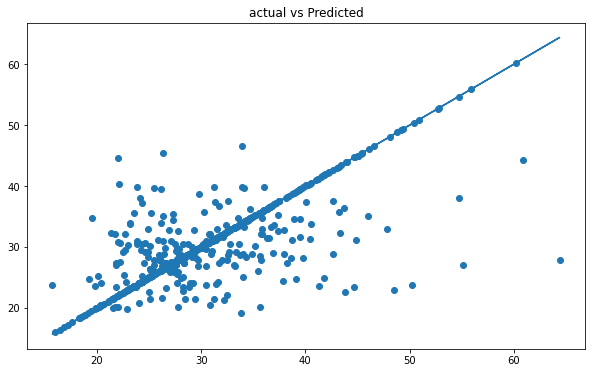

In [90]:
################################################# features
features = predict_df.drop('bmi',axis=1)
target = predict_df["bmi"]
X = features.to_numpy()
y = target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

################################################# initialize

reg = MLPRegressor(random_state=1, max_iter=3500).fit(X_train, y_train)



# predict
in_preds = classifier.predict(X_train)
out_preds = classifier.predict(X_test)

################################################# evaluate Regression
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample MSE: {mean_squared_error(y_train, in_preds)}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")
plt.figure(figsize=(10,6))
plt.scatter(y_test,out_preds)
plt.plot(y_test,y_test)
plt.title("actual vs Predicted")

################################################# evaluate Classification

# print("Model Evaluation Report")
# print(f"In Sample Classification Report: \n{classification_report(y_train, in_preds)}")
# print(f"In Sample Confusion Matrix: \n{confusion_matrix(y_train, in_preds)}")

# # roc curve
# plot_roc_curve(classifier, X_train, y_train)
# plt.title("In Sample ROC Curve")
# plt.show()

# print()
# print(f"Out Sample Classification Report: \n{classification_report(y_test, out_preds)}")
# print(f"Out Sample Confusion Matrix: \n{confusion_matrix(y_test, out_preds)}")

# # roc curve
# plot_roc_curve(classifier, X_test, y_test)
# plt.title("Out Sample ROC Curve")
# plt.show()

# classifier.predict_proba(X_train)

In [ ]:
X = features.to_numpy()
y = target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42)

In [ ]:
#initialize
reg = RandomForestClassifier()

# fit
reg.fit(X_train, y_train)

# predict
in_preds = reg.predict(X_train)
out_preds = reg.predict(X_test)

#evaluate
print('SCORE',reg.score(X,y))
print("Model Evaluation Report")
print(f"The In Sample R2 Score: {r2_score(y_train, in_preds)}")
print(f"The In Sample MSE: {mean_squared_error(y_train, in_preds)}")
print()
print(f"The Out Sample R2 Score: {r2_score(y_test, out_preds)}")
print(f"The Out Sample MSE: {mean_squared_error(y_test, out_preds)}")

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer
import numpy as np

In [ ]:
smoke_df.isnull().any()

In [ ]:
impute_bmi=smoke_df.bmi.to_numpy()


In [ ]:
imp = SimpleImputer(missing_values=np.nan,strategy='mean')
imp.fit(impute_bmi)

In [ ]:
sns.heatmap(df_smoke.corr())

In [ ]:
df.corr()